<h2><b>Analysis of Online Retail Dataset</b></h2>



## Overview of the  Dataset

The Online Retail dataset is a widely-used resource in data analytics, especially for those interested in e-commerce and sales analysis. This dataset captures a comprehensive record of transactions made by a UK-based online retailer between December 1, 2010, and December 9, 2011

The dataset includes detailed information on each transaction, such as invoice numbers, stock codes, product descriptions, quantities, invoice dates, prices, customer IDs, and country of purchase. This rich data provides an excellent opportunity for analyzing sales trends, customer behavior, inventory management, and more.

## Import Library


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import gdown
import datetime

## Get Data

In [ ]:

file_id = '1kpKHND_ljnuE2S0nIzpfJuVSDGqztTop'
# URL to download the file
url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(url, 'Online_Retail.csv', quiet=False)

dataset = pd.read_csv('Online_Retail.csv', encoding='latin1')
dataset.head()


Downloading...
From: https://drive.google.com/uc?id=1kpKHND_ljnuE2S0nIzpfJuVSDGqztTop
To: /content/Online_Retail.csv
100%|██████████| 54.1M/54.1M [00:01<00:00, 43.2MB/s]
<ipython-input-2-7c3d9d4dc9d8>:7: DtypeWarning: Columns (0,1,2,4,6,7,8,9,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('Online_Retail.csv', encoding='latin1')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status,Cleaned_StockCode,Cleaned_ InvoiceNo,Cleaned_Quantity,Total Sales,Country_,Total Sales per Country,TOTAL SALES FOR EACH CUSTOMER,Unnamed: 16,Unnamed: 17
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01/12/2010,2.55,17850.0,United Kingdom,Confirmed,85123,536365,6.0,15.30,United Kingdom,6651803.534,5298.53,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6.0,01/12/2010,3.39,17850.0,United Kingdom,Confirmed,71053,536365,6.0,20.34,France,162062.300,5298.53,NaN,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01/12/2010,2.75,17850.0,United Kingdom,Confirmed,84406,536365,8.0,22.00,Australia,131435.470,5298.53,NaN,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01/12/2010,3.39,17850.0,United Kingdom,Confirmed,84029,536365,6.0,20.34,Germany,188108.820,5298.53,NaN,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01/12/2010,3.39,17850.0,United Kingdom,Confirmed,84029,536365,6.0,20.34,NaN,NaN,5298.53,NaN,NaN


##Data Overview

In [ ]:
dataset.shape

(535951, 18)

##Changing Datatype

In [ ]:
dataset["InvoiceDate"]=pd.to_datetime(dataset["InvoiceDate"], dayfirst=True)
dataset.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,float64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,object
Country,object
Status,object
Cleaned_StockCode,object


## Identifying Null Values

In [ ]:
pd.DataFrame(dataset.isnull().sum(),columns=["Null Values"])

,Null Values
InvoiceNo,99279
StockCode,99279
Description,100646
Quantity,99279
InvoiceDate,99279
UnitPrice,99279
CustomerID,209008
Country,99278
Status,99279
Cleaned_StockCode,99910


In [ ]:

dataset=dataset.dropna(subset=["CustomerID"])
pd.DataFrame(dataset.isnull().sum(),columns=["Null Values"])

,Null Values
InvoiceNo,1
StockCode,1
Description,1
Quantity,1
InvoiceDate,1
UnitPrice,1
CustomerID,0
Country,0
Status,1
Cleaned_StockCode,466


##Extracting Month and Day from Invoice Date

In [ ]:
dataset["Month"] = pd.DatetimeIndex(dataset["InvoiceDate"]).month
dataset["Day"] = pd.DatetimeIndex(dataset["InvoiceDate"]).day

dataset.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status,Cleaned_StockCode,Cleaned_ InvoiceNo,Cleaned_Quantity,Total Sales,Country_,Total Sales per Country,TOTAL SALES FOR EACH CUSTOMER,Unnamed: 16,Unnamed: 17,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01/12/2010,2.55,17850.0,United Kingdom,Confirmed,85123,536365,6.0,15.30,United Kingdom,6651803.534,5298.53,NaN,NaN,1.0,12.0
1,536365,71053,WHITE METAL LANTERN,6.0,01/12/2010,3.39,17850.0,United Kingdom,Confirmed,71053,536365,6.0,20.34,France,162062.300,5298.53,NaN,NaN,1.0,12.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01/12/2010,2.75,17850.0,United Kingdom,Confirmed,84406,536365,8.0,22.00,Australia,131435.470,5298.53,NaN,NaN,1.0,12.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01/12/2010,3.39,17850.0,United Kingdom,Confirmed,84029,536365,6.0,20.34,Germany,188108.820,5298.53,NaN,NaN,1.0,12.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01/12/2010,3.39,17850.0,United Kingdom,Confirmed,84029,536365,6.0,20.34,NaN,NaN,5298.53,NaN,NaN,1.0,12.0


##Monthly Revenue by Summing Total Sales

In [ ]:
data_Revnue=dataset.groupby("Month")["Total Sales"].sum().reset_index()
data_Revnue

,Month,Total Sales
0,1.0,613450.570
1,2.0,530377.430
2,3.0,756435.550
3,4.0,634983.511
4,5.0,705541.540
5,6.0,701120.760
6,7.0,743044.521
7,8.0,620686.250
8,9.0,909893.042
9,10.0,917937.760


Text(0.5, 1.0, 'Revnue Per Month')

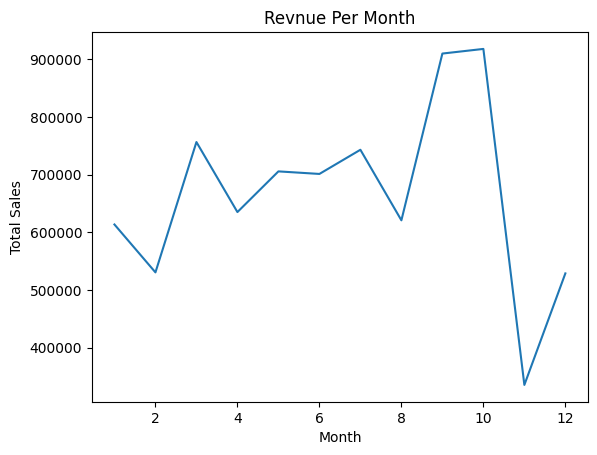

In [ ]:
graph=sns.lineplot(x="Month",y="Total Sales",data=data_Revnue,sort=False)
graph.set_title("Revnue Per Month")

##Monthly Grow Rate

In [ ]:

data_Revnue["Monthly Growth"]=data_Revnue["Total Sales"].pct_change()
data_Revnue

,Month,Total Sales,Monthly Growth
0,1.0,613450.570,NaN
1,2.0,530377.430,-0.135419
2,3.0,756435.550,0.426221
3,4.0,634983.511,-0.160558
4,5.0,705541.540,0.111118
5,6.0,701120.760,-0.006266
6,7.0,743044.521,0.059795
7,8.0,620686.250,-0.164672
8,9.0,909893.042,0.465947
9,10.0,917937.760,0.008841


In [ ]:
data_Revnue=data_Revnue.loc[data_Revnue["Month"]!=12]
data_Revnue

,Month,Total Sales,Monthly Growth
0,1.0,613450.570,NaN
1,2.0,530377.430,-0.135419
2,3.0,756435.550,0.426221
3,4.0,634983.511,-0.160558
4,5.0,705541.540,0.111118
5,6.0,701120.760,-0.006266
6,7.0,743044.521,0.059795
7,8.0,620686.250,-0.164672
8,9.0,909893.042,0.465947
9,10.0,917937.760,0.008841


In [ ]:
data_Revnue["Monthly Growth"]=data_Revnue["Monthly Growth"].fillna(0)
data_Revnue

<ipython-input-22-db8a3c85337e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Revnue["Monthly Growth"]=data_Revnue["Monthly Growth"].fillna(0)


,Month,Total Sales,Monthly Growth
0,1.0,613450.570,0.000000
1,2.0,530377.430,-0.135419
2,3.0,756435.550,0.426221
3,4.0,634983.511,-0.160558
4,5.0,705541.540,0.111118
5,6.0,701120.760,-0.006266
6,7.0,743044.521,0.059795
7,8.0,620686.250,-0.164672
8,9.0,909893.042,0.465947
9,10.0,917937.760,0.008841


Text(0.5, 1.0, 'Monthly Growth Rate')

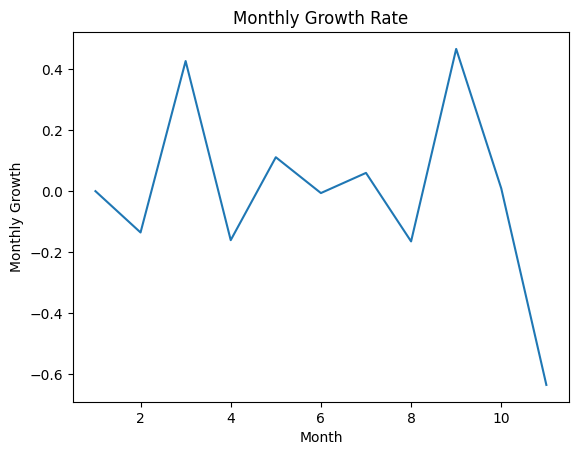

In [ ]:
graph=sns.lineplot(x="Month",y="Monthly Growth",data=data_Revnue,sort=False)
graph.set_title("Monthly Growth Rate")

## Monthly Active Customers

In [ ]:
Active_Cust=dataset.groupby("Month")["CustomerID"].nunique().reset_index()
Active_Cust

,Month,CustomerID
0,1.0,971
1,2.0,902
2,3.0,1074
3,4.0,961
4,5.0,1038
5,6.0,1065
6,7.0,1091
7,8.0,971
8,9.0,1229
9,10.0,1306


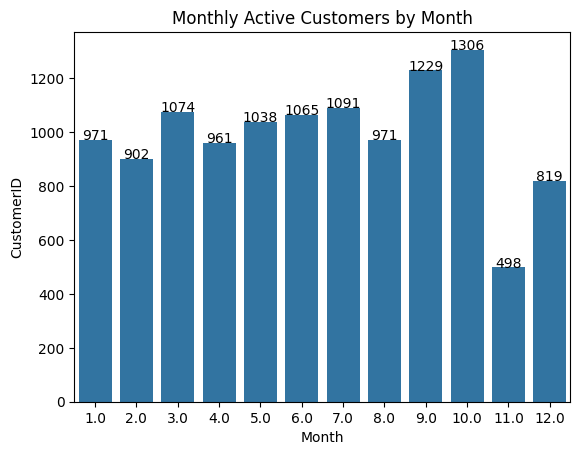

In [ ]:
graph=sns.barplot(x="Month",y="CustomerID",data=Active_Cust)
graph.set_title("Monthly Active Customers by Month")
for p in graph.patches:
  height=p.get_height()
  graph.text(x=p.get_x()+(p.get_width()/2),y=p.get_height()+0.2,ha="center",s="{:.0f}".format(height))

##Total Unique Order by Month

In [ ]:
uniq_order=dataset.groupby("Month")["InvoiceNo"].nunique().reset_index()
uniq_order

,Month,InvoiceNo
0,1.0,1745
1,2.0,1505
2,3.0,2043
3,4.0,1737
4,5.0,2028
5,6.0,2109
6,7.0,2054
7,8.0,1841
8,9.0,2164
9,10.0,2364


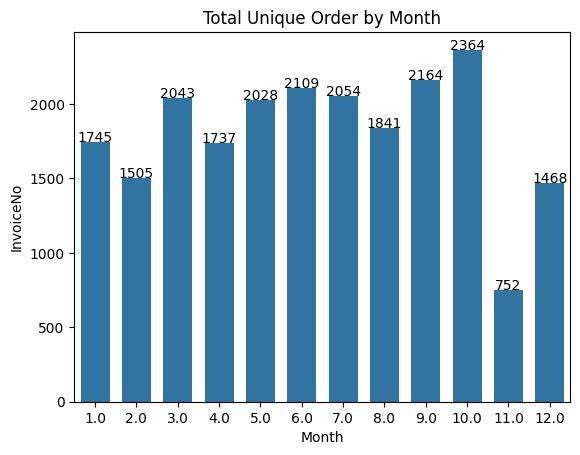

In [ ]:
graph=sns.barplot(x="Month",y="InvoiceNo",data=uniq_order,width=0.7)
graph.set_title("Total Unique Order by Month")
for p in graph.patches:
  height=p.get_height()
  graph.text(x=p.get_x()+(p.get_width()/2),y=p.get_height()+0.2,ha="center",s="{:.0f}".format(height))

##Total Quantity on Monthly Basis

In [ ]:
data_order_sales=dataset.groupby("Month")["Quantity"].sum().reset_index()
data_order_sales

,Month,Quantity
0,1.0,334693.0
1,2.0,290732.0
2,3.0,395229.0
3,4.0,354760.0
4,5.0,400754.0
5,6.0,352771.0
6,7.0,423223.0
7,8.0,336216.0
8,9.0,472047.0
9,10.0,472825.0


<ipython-input-46-f5f87dbb5e38>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x="Month",y="Quantity",data=data_order_sales, width=0.6,palette=colors)


Text(0.5, 1.0, 'Total Quantity on Monthly Basis')

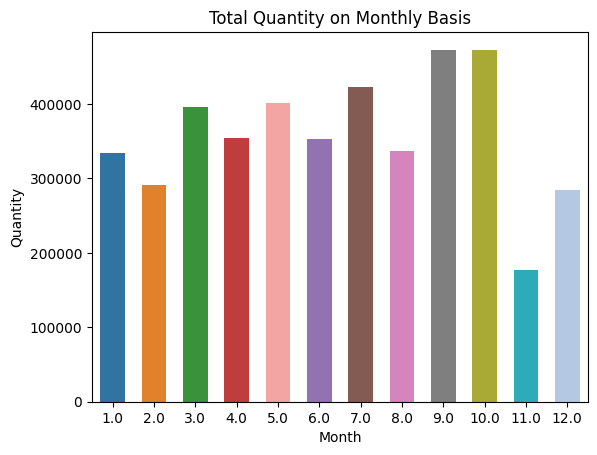

In [ ]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728","#ff9896", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",  "#aec7e8"]
graph=sns.barplot(x="Month",y="Quantity",data=data_order_sales, width=0.6,palette=colors)
graph.set_title("Total Quantity on Monthly Basis")


##Average Revnue

In [ ]:
Average_Revnue=dataset.groupby("Month")["Total Sales"].mean().reset_index()
Average_Revnue

,Month,Total Sales
0,1.0,16.757282
1,2.0,17.269950
2,3.0,19.732243
3,4.0,18.285009
4,5.0,19.069206
5,6.0,17.937441
6,7.0,17.555689
7,8.0,17.419838
8,9.0,20.138842
9,10.0,17.271676


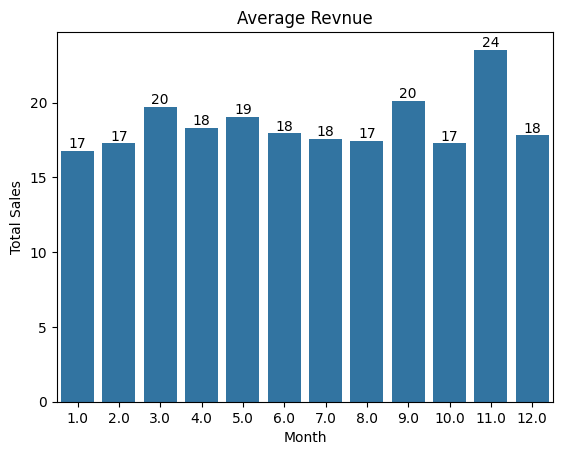

In [ ]:

graph=sns.barplot(x="Month",y="Total Sales",data=Average_Revnue)
graph.set_title("Average Revnue")

for p in graph.patches:
  height=p.get_height()
  graph.text(x=p.get_x()+(p.get_width()/2),y=p.get_height()+0.2,ha="center",s="{:.0f}".format(height))